# Package Imports

In [66]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from skimage.transform import resize

In [30]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Data Preprocessing

In [48]:
# Define paths
input_directory = "/Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/rawTesting/pituitary"
output_directory = "/Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary"

# Ensure the output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

**Load images**

In [49]:
# Load images from the directory
def load_images_from_directory(directory):
    images = []
    filenames = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust extensions as needed
            filepath = os.path.join(directory, filename)
            image = cv2.imread(filepath)  # Load image
            if image is not None:
                images.append(image)
                filenames.append(filename)
    return images, filenames

images, filenames = load_images_from_directory(input_directory)

**Apply Clahe**

In [50]:
def apply_clahe(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Create CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    
    # Apply CLAHE
    enhanced_image = clahe.apply(gray_image)
    return enhanced_image

**Save Processed Images**

In [51]:
def save_images(images, filenames, output_directory):
    for img, filename in zip(images, filenames):
        output_path = os.path.join(output_directory, filename)
        cv2.imwrite(output_path, img)  # Save image
        print(f"Saved processed image: {output_path}")

In [52]:
# Process all images
processed_images = []
for image in images:
    processed_image = apply_clahe(image)  # Apply CLAHE
    processed_images.append(processed_image)

# Save processed images
save_images(processed_images, filenames, output_directory)

Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0233.jpg
Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0227.jpg
Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0019.jpg
Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0031.jpg
Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0025.jpg
Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0186.jpg
Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0192.jpg
Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0179.jpg
Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0145.jpg
Saved processed image: /Users/arsalankhan/Docu

# Image Normalization

In [57]:
import os
import cv2
import numpy as np

# Directories
input_directory = "/Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/"
output_directory = "/Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedTesting/"

# Ensure output directory exists and create subfolders
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for subfolder in os.listdir(input_directory):
    subfolder_path = os.path.join(output_directory, subfolder)
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

In [58]:
# Function to normalize images
def normalize_image(image):
    return image / 255.0  # Normalize to range [0, 1]

# Iterate through each subfolder (class folder)
for class_folder in os.listdir(input_directory):
    class_input_path = os.path.join(input_directory, class_folder)
    class_output_path = os.path.join(output_directory, class_folder)

    if os.path.isdir(class_input_path):  # Ensure it's a directory
        for filename in os.listdir(class_input_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust for valid formats
                # Load image
                image_path = os.path.join(class_input_path, filename)
                image = cv2.imread(image_path)
                
                # Normalize image
                if image is not None:
                    normalized_image = normalize_image(image)
                    
                    # Save normalized image
                    output_path = os.path.join(class_output_path, filename.replace(".jpg", ".npy").replace(".png", ".npy"))
                    np.save(output_path, normalized_image)
                    print(f"Saved normalized image: {output_path}")

Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedTesting/pituitary/Te-pi_0233.npy
Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedTesting/pituitary/Te-pi_0227.npy
Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedTesting/pituitary/Te-pi_0019.npy
Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedTesting/pituitary/Te-pi_0031.npy
Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedTesting/pituitary/Te-pi_0025.npy
Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedTesting/pituitary/Te-pi_0186.npy
Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedTesting/pituitary/Te-pi_0192.npy
Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedTesting/pituitary/Te-pi_0179.npy
Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BR

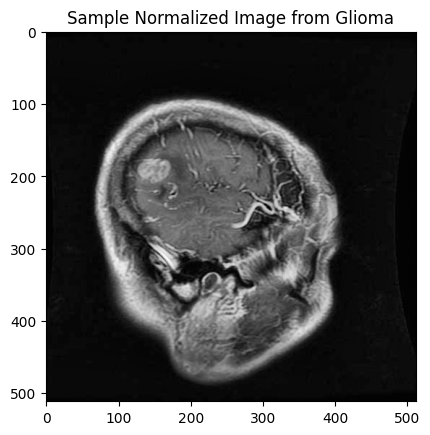

In [59]:
# Reload a sample normalized image
sample_class = "Glioma"  # Change to any class folder
sample_file = os.listdir(os.path.join(output_directory, sample_class))[0]  # Pick the first file
sample_image_path = os.path.join(output_directory, sample_class, sample_file)

# Load the normalized image
sample_image = np.load(sample_image_path)

# Display the image
import matplotlib.pyplot as plt

plt.imshow(sample_image)
plt.title(f"Sample Normalized Image from {sample_class}")
plt.show()

Processing class: pituitary
Processing class: .DS_Store


NotADirectoryError: [Errno 20] Not a directory: 'Output/Training/.DS_Store'

# Balancing Dataset using GAN

In [10]:
import os
# Count the number of files in each subfolder of training and validation
for subfolder_name in os.listdir(input_dir):
    subfolder_path = os.path.join(input_dir, subfolder_name)
    if os.path.isdir(subfolder_path):
        subfolder_file_count = sum(len(files) for _, _, files in os.walk(subfolder_path))
        print(f"Total number of files in subfolder '{subfolder_name}' of training: {subfolder_file_count}")

for subfolder_name in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder_name)
    if os.path.isdir(subfolder_path):
        subfolder_file_count = sum(len(files) for _, _, files in os.walk(subfolder_path))
        print(f"Total number of files in subfolder '{subfolder_name}' of validation: {subfolder_file_count}")
output_folder = '/Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Output'
# Count the number of files in each folder
for folder_name in os.listdir(output_folder):
    folder_path = os.path.join(output_folder, folder_name)
    if os.path.isdir(folder_path):
        file_count = sum(len(files) for _, _, files in os.walk(folder_path))
        print(f"Total number of files in folder '{folder_name}': {file_count}")
file_count = sum(len(files) for _, _, files in os.walk(output_folder))

print(f"Total number of files in the output folder: {file_count}")

Total number of files in subfolder 'pituitary' of training: 1165
Total number of files in subfolder 'notumor' of training: 1276
Total number of files in subfolder 'glioma' of training: 1056
Total number of files in subfolder 'meningioma' of training: 1071
Total number of files in subfolder 'pituitary' of validation: 292
Total number of files in subfolder 'notumor' of validation: 319
Total number of files in subfolder 'glioma' of validation: 265
Total number of files in subfolder 'meningioma' of validation: 268
Total number of files in folder 'Training': 4569
Total number of files in folder 'Validation': 1145
Total number of files in the output folder: 5715


In [3]:
#### AUGUMENTATION

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Paths
base_dir = "Output/Validation"  # Directory containing subfolders
output_dir = "AugValidation"         # Directory for saving augmented images

# Target counts for each folder
TARGET_COUNTS = {
    "glioma": 319,        # No augmentation needed
    "meningioma": 319,     # Augment to reach 574 images
    "pituitary": 319,
    "notumor": 319     # Augment to reach 1140 images
}

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Image augmentation setup
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Function to augment images to the target count
def augment_images_to_target(input_dir, output_dir, target_count):
    class_name = os.path.basename(input_dir)
    output_class_dir = os.path.join(output_dir, class_name)

    # Ensure output subfolder exists
    if not os.path.exists(output_class_dir):
        os.makedirs(output_class_dir)

    # Copy existing images to the output directory
    current_images = [img for img in os.listdir(input_dir) if img.endswith((".png", ".jpg", ".jpeg"))]
    for img_name in current_images:
        src_path = os.path.join(input_dir, img_name)
        dest_path = os.path.join(output_class_dir, img_name)
        if not os.path.exists(dest_path):  # Avoid overwriting
            os.system(f'cp "{src_path}" "{dest_path}"')

    # Update the count of existing images
    current_count = len(os.listdir(output_class_dir))
    deficit = target_count - current_count

    if deficit <= 0:
        print(f"No augmentation needed for {class_name}. Current count: {current_count}")
        return

    print(f"Augmenting {class_name} with {deficit} images...")

    # Augment images
    augmented_count = 0
    while augmented_count < deficit:
        for img_name in current_images:
            if augmented_count >= deficit:
                break

            img_path = os.path.join(input_dir, img_name)
            img = load_img(img_path)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_class_dir,
                                      save_prefix="aug", save_format="png"):
                augmented_count += 1
                if augmented_count >= deficit:
                    break

    print(f"Augmentation for {class_name} complete. Total images: {len(os.listdir(output_class_dir))}")

# Main process
# Augment each class folder based on the target counts
for folder_name, target_count in TARGET_COUNTS.items():
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.exists(folder_path):
        augment_images_to_target(folder_path, output_dir, target_count)
    else:
        print(f"Folder not found: {folder_name}")

print("Data augmentation process complete!")



Augmenting glioma with 54 images...
Augmentation for glioma complete. Total images: 319
Augmenting meningioma with 51 images...
Augmentation for meningioma complete. Total images: 319
Augmenting pituitary with 27 images...
Augmentation for pituitary complete. Total images: 319
No augmentation needed for notumor. Current count: 319
Data augmentation process complete!


# Data Splitting

In [28]:
import os
import random
import shutil

def split_dataset(data_dir, output_dir, split_ratio=0.8):
    """
    Splits a dataset into training and validation sets while maintaining class distribution.

    Args:
    - data_dir (str): Path to the original dataset directory.
    - output_dir (str): Path to the output directory.
    - split_ratio (float): Proportion of data to keep in the training set.

    Directories Created:
    - output_dir/Training
    - output_dir/Validation
    """
    # Create output directories
    train_dir = os.path.join(output_dir, "Training")
    val_dir = os.path.join(output_dir, "Validation")
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # Iterate over each class
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            # Get all files in the class directory
            files = os.listdir(class_path)
            random.shuffle(files)

            # Calculate split index
            split_idx = int(len(files) * split_ratio)

            # Define class-specific train/val directories
            train_class_dir = os.path.join(train_dir, class_name)
            val_class_dir = os.path.join(val_dir, class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(val_class_dir, exist_ok=True)

            # Copy files to respective directories
            for file in files[:split_idx]:
                shutil.copy(os.path.join(class_path, file), os.path.join(train_class_dir, file))
            for file in files[split_idx:]:
                shutil.copy(os.path.join(class_path, file), os.path.join(val_class_dir, file))

            print(f"Class '{class_name}': {split_idx} training files, {len(files) - split_idx} validation files")

# Example usage
output_directory = "/Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Output"
split_dataset(data_directory, output_directory, split_ratio=0.8)

Class 'pituitary': 1165 training files, 292 validation files
Class 'notumor': 1276 training files, 319 validation files
Class 'glioma': 1056 training files, 265 validation files
Class 'meningioma': 1071 training files, 268 validation files


In [19]:
import cv2
import os

# Directory containing the images
image_dir = "AugTraining/glioma"

# Iterate through each image file
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)

        # Check the shape of the image
        if image is not None:
            print(f"Image shape: {image.shape}")

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
I

# Brain Tumor Feature Extraction and PCA and Model Training

Found 5093 images belonging to 4 classes.
Train generator image shape: (224, 224)
Found 1276 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Batch 1: Feature shape: (32, 25088), Labels shape: (32, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Batch 2: Feature shape: (32, 25088), Labels shape: (32, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Batch 3: Feature shape: (32, 25088), Labels shape: (32, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Batch 4: Feature shape: (32, 25088), Labels shape: (32, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Batch 5: Feature shape: (32, 25088), Labels shape: (32, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Batch 6: Feature shape: (32, 25088), Labels shape: (32, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Batch 7: Feature shape: (32, 25088), Labels shape: (32, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Batch 8: Feature shape: (32, 25088), Labels shape: (32, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Batch 9: Feature shape: (32, 25088), L

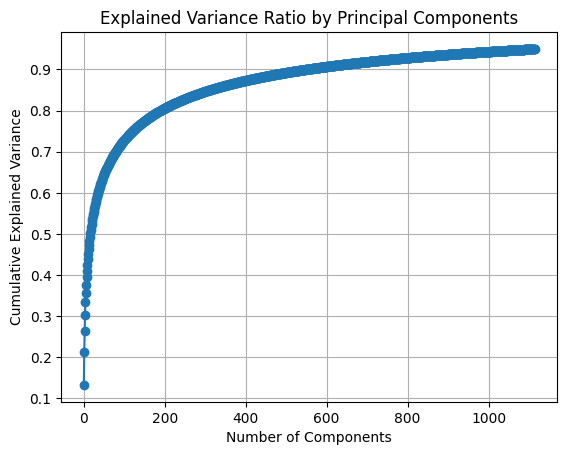

X_train_pca shape: (5093, 1115)
y_train shape: (5093, 4)
Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6288 - loss: 0.9326 - val_accuracy: 0.8887 - val_loss: 0.3127
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9347 - loss: 0.2009 - val_accuracy: 0.9154 - val_loss: 0.2569
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9730 - loss: 0.0893 - val_accuracy: 0.9177 - val_loss: 0.2621
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9841 - loss: 0.0482 - val_accuracy: 0.9240 - val_loss: 0.2781
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9876 - loss: 0.0307 - val_accuracy: 0.9201 - val_loss: 0.3014
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9934 - loss: 0.0204 - val_accuracy: 0.9216 - val_loss: 0.3360
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9933 - loss: 0.0217 - val_accuracy: 0.9114 - val_loss: 0.4157
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step
Classi

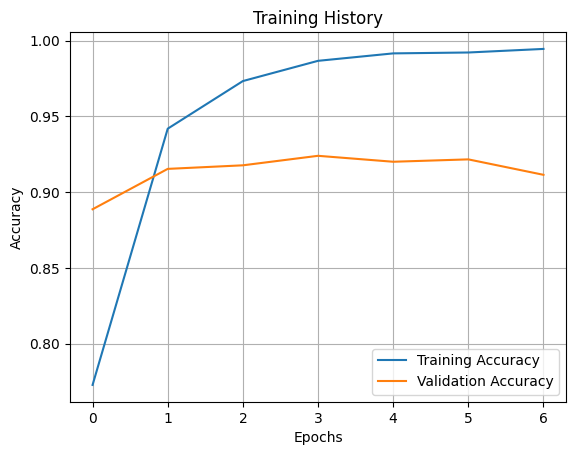

In [28]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.decomposition import PCA
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

class BrainTumorClassifier:
    def __init__(self, train_dir, val_dir, test_dir, img_size=(224, 224), batch_size=32, learning_rate=0.001):
        self.train_dir = train_dir
        self.val_dir = val_dir
        self.test_dir = test_dir
        self.img_size = img_size
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.train_generator = None
        self.val_generator = None
        self.test_generator = None
        self.feature_extractor = None
        self.pca = None  # PCA model

    def create_data_generators(self):
        train_datagen = ImageDataGenerator(rescale=1./255)
        val_test_datagen = ImageDataGenerator(rescale=1./255)

        self.train_generator = train_datagen.flow_from_directory(
            self.train_dir,
            target_size=self.img_size,
            batch_size=self.batch_size,
            class_mode='categorical'
        )
        print(f"Train generator image shape: {self.img_size}")

        self.val_generator = val_test_datagen.flow_from_directory(
            self.val_dir,
            target_size=self.img_size,
            batch_size=self.batch_size,
            class_mode='categorical'
        )

        self.test_generator = val_test_datagen.flow_from_directory(
            self.test_dir,
            target_size=self.img_size,
            batch_size=self.batch_size,
            class_mode='categorical',
            shuffle=False  # Ensures consistent order for evaluation
        )

    def extract_features(self, data_generator):
        base_model = VGG19(weights='imagenet', include_top=False, input_shape=(*self.img_size, 3))
        self.feature_extractor = Model(inputs=base_model.input, outputs=Flatten()(base_model.output))

        features, labels = [], []
        for i, (x_batch, y_batch) in enumerate(data_generator):
            feature_batch = self.feature_extractor.predict(x_batch)
            features.append(feature_batch)
            labels.append(y_batch)

            # Debug: Print shape of extracted features
            print(f"Batch {i+1}: Feature shape: {feature_batch.shape}, Labels shape: {y_batch.shape}")
            if i >= len(data_generator) - 1:  # Stop when all batches are processed
                break

        return np.vstack(features), np.vstack(labels)

    def perform_pca(self, train_features, val_features, test_features, n_components=0.95):
        print("Performing PCA for feature selection...")
        self.pca = PCA(n_components=n_components)
        train_reduced = self.pca.fit_transform(train_features)
        val_reduced = self.pca.transform(val_features)
        test_reduced = self.pca.transform(test_features)

        # Debugging: Explained variance
        explained_variance = np.cumsum(self.pca.explained_variance_ratio_)
        print(f"Original features: {train_features.shape}")
        print(f"Reduced features: {train_reduced.shape}")

        plt.plot(explained_variance, marker='o')
        plt.title('Explained Variance Ratio by Principal Components')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.grid()
        plt.show()

        return train_reduced, val_reduced, test_reduced

    def build_classifier(self, input_dim):
        model = Sequential([
            Dense(128, activation='relu', input_dim=input_dim),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(4, activation='softmax')  # Assuming 4 classes: Glioma, Meningioma, No Tumor, Pituitary
        ])
        model.compile(optimizer=Adam(learning_rate=self.learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    def train_classifier(self, model, X_train, y_train, X_val, y_val, epochs=20):
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=self.batch_size,
            callbacks=[early_stopping]
        )
        return history

    def evaluate(self, model, X_test, y_test):
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_test_classes = np.argmax(y_test, axis=1)
        accuracy = accuracy_score(y_test_classes, y_pred_classes)
        print("Classification Report:")
        print(classification_report(y_test_classes, y_pred_classes))
        return accuracy

def main():
    train_dir = "AugTraining"
    val_dir = "AugValidation"
    test_dir = "Testing"

    classifier = BrainTumorClassifier(train_dir, val_dir, test_dir)

    # Step 1: Data Preparation
    classifier.create_data_generators()

    # Step 2: Feature Extraction
    X_train, y_train = classifier.extract_features(classifier.train_generator)
    X_val, y_val = classifier.extract_features(classifier.val_generator)
    X_test, y_test = classifier.extract_features(classifier.test_generator)

    # Step 3: Apply PCA
    X_train_pca, X_val_pca, X_test_pca = classifier.perform_pca(X_train, X_val, X_test)

    # Debugging: Check the shape of PCA output and labels
    print(f"X_train_pca shape: {X_train_pca.shape}")
    print(f"y_train shape: {y_train.shape}")

    # Step 4: Build and Train the Classifier
    input_dim = X_train_pca.shape[1]  # Input dimension must match PCA-reduced feature size
    model = classifier.build_classifier(input_dim=input_dim)
    history = classifier.train_classifier(model, X_train_pca, y_train, X_val_pca, y_val)

    # Step 5: Evaluate Model
    accuracy = classifier.evaluate(model, X_test_pca, y_test)
    print(f"Test Accuracy: {accuracy:.4f}")

    # Step 6: Plot Training History
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Training History')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()
